In [32]:
import scanpy as sc
import numpy as np
import pandas as pd
from pathlib import Path

import spatialdata as sd
import spatialdata_plot

import spatialdata_io as sdio

from napari_spatialdata import Interactive

/Users/rushin.gindra/miniforge3/envs/spatialdata/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [35]:
xenium_output_path = Path("/Users/rushin.gindra/Documents/Research/TeachingCourses/data/pdac_human_xenium")
sdata_path = Path("/Users/rushin.gindra/Documents/Research/TeachingCourses/zarr_files/pdac_human_xenium.zarr")
save_path = Path("/Users/rushin.gindra/Documents/Research/TeachingCourses/zarr_files/pdac_human_mmseg_xenium_napari.zarr")

In [ ]:

sdata = sdio.xenium(xenium_output_path, n_jobs=6)
sdata.write(sdata_path)

In [36]:
sdata = sd.read_zarr(sdata_path)
sdata

/Users/rushin.gindra/miniforge3/envs/spatialdata/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/rushin.gindra/miniforge3/envs/spatialdata/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


SpatialData object, with associated Zarr store: /Users/rushin.gindra/Documents/Research/TeachingCourses/zarr_files/pdac_human_xenium.zarr
├── Images
│     ├── 'he_image': DataTree[cyx] (3, 71883, 20562), (3, 35941, 10281), (3, 17970, 5140), (3, 8985, 2570), (3, 4492, 1285)
│     ├── 'morphology_focus': DataTree[cyx] (1, 13752, 48274), (1, 6876, 24137), (1, 3438, 12068), (1, 1719, 6034), (1, 859, 3017)
│     └── 'morphology_mip': DataTree[cyx] (1, 13752, 48274), (1, 6876, 24137), (1, 3438, 12068), (1, 1719, 6034), (1, 859, 3017)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (13752, 48274), (6876, 24137), (3438, 12068), (1719, 6034), (859, 3017)
│     └── 'nucleus_labels': DataTree[yx] (13752, 48274), (6876, 24137), (3438, 12068), (1719, 6034), (859, 3017)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (190965, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (190965, 2) (2D 

INFO     Rasterizing image for faster rendering.                                                                   


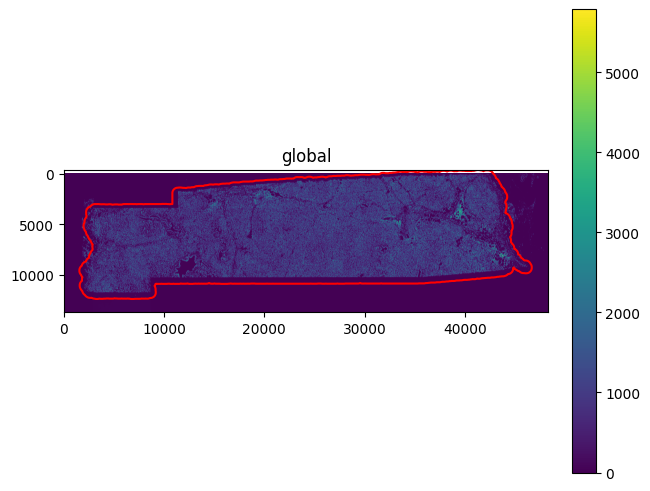

In [37]:
sdata.pl.render_images("morphology_mip").pl.render_shapes("region_of_interest", outline_color="red", fill_alpha=0.0, outline_alpha=1.0).pl.show()

INFO     Rasterizing image for faster rendering.                                                                   


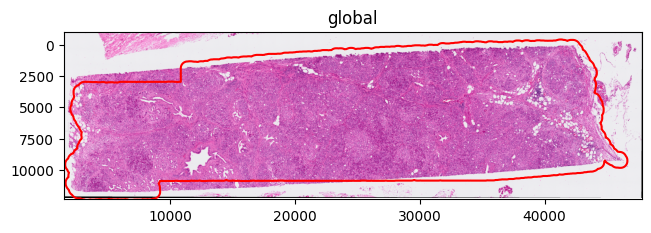

In [10]:
sdata.pl.render_images("he_image").pl.render_shapes("region_of_interest", outline_color="red", fill_alpha=0.0, outline_alpha=1.0).pl.show(dpi=100)

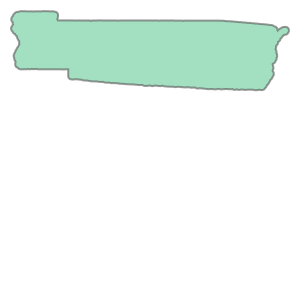

In [11]:
for _, polygon in sdata["region_of_interest"].iterrows():
    display(polygon.geometry)


```
spatialdata.polygon_query(element, polygon, target_coordinate_system, filter_table=True, clip=False, shapes=True, points=True, images=True, labels=True)
Query a SpatialData object or a SpatialElement by a polygon or multipolygon.

Parameters:
    element (DataArray | DataTree | GeoDataFrame | DataFrame | SpatialData) – The SpatialElement or SpatialData object to query.
    polygon (Polygon | MultiPolygon) – The polygon/multipolygon to query by.
    target_coordinate_system (str) – The coordinate system of the polygon/multipolygon.
    filter_table (bool (default: True)) – Specifies whether to filter the tables to only include tables that annotate elements in the retrieved SpatialData object of the query.
    clip (bool (default: False)) – If True, the shapes are clipped to the polygon. This behavior is implemented only when querying polygons/multipolygons or circles, and it is ignored for other types of elements (images, labels, points). Importantly, when clipping is enabled, the circles will be converted to polygons before the clipping. This may affect downstream operations that rely on the circle radius or on performance, so it is recommended to disable clipping when querying circles or when querying a SpatialData object that contains circles.
```

In [ ]:
interactive = Interactive(sdata)
interactive.run()
sdata.write(save_path, overwrite=True)

INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /Users/rushin.gindra/Documents/Research/TeachingCourses/zarr_files/pdac_human_mmseg_xenium_napari.zarr).  
         Please see the documentation of `is_self_contained()` to understand the implications of working with      
         SpatialData objects that are not self-contained.                                                          
INFO     The Zarr backing store has been changed from                                                              
         /Users/rushin.gindra/Documents/Research/TeachingCourses/zarr_files/pdac_human_xenium.zarr the new file    
         path:                                                                                                     
         /Users/rushin.gindra/Documents/Research/TeachingCourses/zarr_fi

/Users/rushin.gindra/miniforge3/envs/spatialdata/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
2025-04-23 10:30:36.989 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-04-23 10:30:36.990 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-04-23 10:30:45.587 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-04-23 10:30:47.688 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-04-23 10:30:47.690 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-04-23 10:30:57.116 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-04-23 10:30:57.121 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-04-23 10:31:07.088 | INFO     | napari_spatiald

INFO: Layer(s) inherited info from he_image
INFO: Layer saved


2025-04-23 10:32:03.972 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-04-23 10:32:03.976 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-04-23 10:32:10.904 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-04-23 10:32:10.908 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-04-23 10:32:10.923 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.


In [39]:
sdata

SpatialData object, with associated Zarr store: /Users/rushin.gindra/Documents/Research/TeachingCourses/zarr_files/pdac_human_mmseg_xenium_napari.zarr
├── Images
│     ├── 'he_image': DataTree[cyx] (3, 71883, 20562), (3, 35941, 10281), (3, 17970, 5140), (3, 8985, 2570), (3, 4492, 1285)
│     ├── 'morphology_focus': DataTree[cyx] (1, 13752, 48274), (1, 6876, 24137), (1, 3438, 12068), (1, 1719, 6034), (1, 859, 3017)
│     └── 'morphology_mip': DataTree[cyx] (1, 13752, 48274), (1, 6876, 24137), (1, 3438, 12068), (1, 1719, 6034), (1, 859, 3017)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (13752, 48274), (6876, 24137), (3438, 12068), (1719, 6034), (859, 3017)
│     └── 'nucleus_labels': DataTree[yx] (13752, 48274), (6876, 24137), (3438, 12068), (1719, 6034), (859, 3017)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'Lasso_shape': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── 'cell_boundaries': GeoDataFrame shape: (190965, 

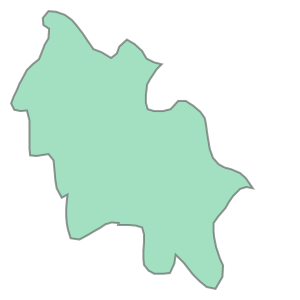

In [40]:
for _, polygon in sdata["Lasso_shape"].iterrows():
    display(polygon.geometry)

INFO     Rasterizing image for faster rendering.                                                                   


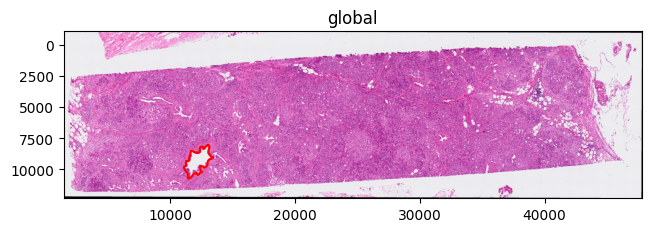

In [41]:
sdata.pl.render_images("he_image").pl.render_shapes("Lasso_shape", outline_color="red", fill_alpha=0.0, outline_alpha=1.0).pl.show(dpi=100)

In [16]:
adata = sdata["table"]
adata

AnnData object with n_obs × n_vars = 190965 × 474
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'cell_labels'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [43]:
annotations = sdata.shapes["Lasso_shape"]
# annotations

# Step 1: Extract the polygon from the geodataframe
polygon = annotations.geometry.iloc[0]

# Step 2: Get the bounds of the polygon
min_x, min_y, max_x, max_y = polygon.bounds

# Step 3: Print the coordinates
print(f"Minimum X: {min_x}, Maximum X: {max_x}")
print(f"Minimum Y: {min_y}, Maximum Y: {max_y}")


Minimum X: 11034.151112369329, Maximum X: 13374.079222760614
Minimum Y: 7990.867261949619, Maximum Y: 10679.947179650597


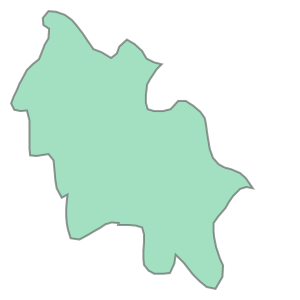

In [44]:
polygon

In [73]:
sdata.tables["table"].obs["region"] = "cell_boundaries"
sdata.set_table_annotates_spatialelement("table", region="cell_boundaries")

/Users/rushin.gindra/miniforge3/envs/spatialdata/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:511: UserWarning: Converting `region_key: region` to categorical dtype.
  convert_region_column_to_categorical(table)


In [74]:
sdata_cropped = sdata.query.bounding_box(
    min_coordinate=[min_x, min_y], max_coordinate=[max_x, max_y], axes=("x", "y"), target_coordinate_system='global'
)

sdata_cropped

/Users/rushin.gindra/miniforge3/envs/spatialdata/lib/python3.10/functools.py:889: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


SpatialData object
├── Images
│     ├── 'he_image': DataTree[cyx] (3, 3645, 4185), (3, 1822, 2093), (3, 911, 1046), (3, 455, 523), (3, 228, 261)
│     ├── 'morphology_focus': DataTree[cyx] (1, 2689, 2340), (1, 1345, 1170), (1, 672, 585), (1, 336, 293), (1, 168, 146)
│     └── 'morphology_mip': DataTree[cyx] (1, 2689, 2340), (1, 1345, 1170), (1, 672, 585), (1, 336, 293), (1, 168, 146)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (2689, 2340), (1345, 1170), (672, 585), (336, 293), (168, 146)
│     └── 'nucleus_labels': DataTree[yx] (2689, 2340), (1345, 1170), (672, 585), (336, 293), (168, 146)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'Lasso_shape': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── 'cell_boundaries': GeoDataFrame shape: (1444, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (1361, 2) (2D shapes)
│     ├── 'image_patches': GeoDataFrame shape: (9, 3) (2D shapes)
│     ├── 'nucleus_boundaries':

In [75]:
adata = sdata_cropped["table"]  

In [76]:
adata.var_names

Index(['ABCC11', 'ACE2', 'ACKR1', 'ACTA2', 'ACTG2', 'ACTN1', 'ADAM28',
       'ADAMTS1', 'ADGRE1', 'ADGRL4',
       ...
       'UMOD', 'UPK3B', 'UQCC2', 'VAMP8', 'VCAN', 'VSIG4', 'VTN', 'VWA5A',
       'VWF', 'YAF2'],
      dtype='object', length=474)

In [77]:
sdata_cropped["table"].var_names

Index(['ABCC11', 'ACE2', 'ACKR1', 'ACTA2', 'ACTG2', 'ACTN1', 'ADAM28',
       'ADAMTS1', 'ADGRE1', 'ADGRL4',
       ...
       'UMOD', 'UPK3B', 'UQCC2', 'VAMP8', 'VCAN', 'VSIG4', 'VTN', 'VWA5A',
       'VWF', 'YAF2'],
      dtype='object', length=474)

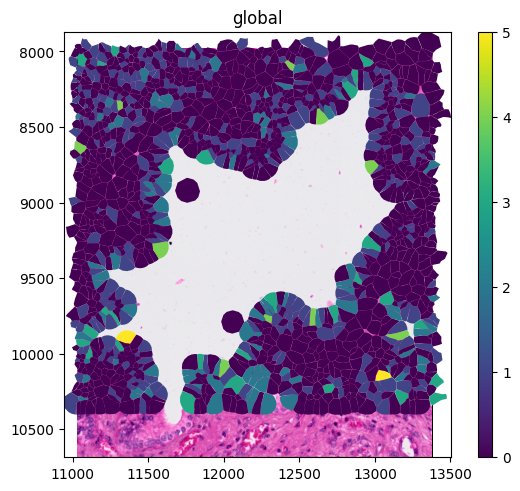

In [81]:
sdata_cropped.pl.render_images("he_image").pl.render_shapes("cell_boundaries", color="VAMP8", fill_alpha=1.0).pl.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2780161476355247].


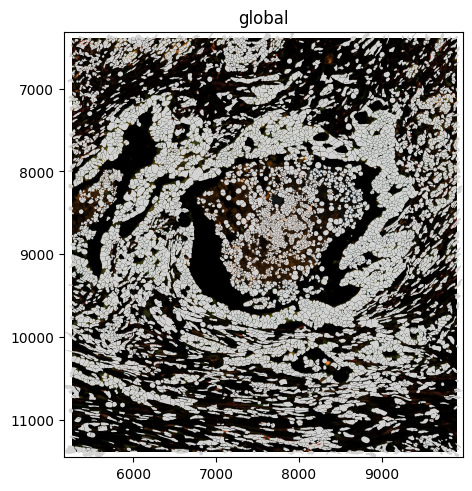

In [28]:
sdata_cropped.pl.render_images("morphology_focus").pl.render_shapes("cell_boundaries", outline_alpha=0.0, color="UBE2C", fill_alpha=1.0, outline_width=0.5).pl.show()